# Platus library demo

### Setup the environment

In [1]:
%load_ext autoreload

Loading all the packages and own libraries that are needed

In [2]:
# General modules and packages
import matplotlib.pyplot as plt
import numpy as np
import shutil
import os
import pylab as pl
pl.rc('text', usetex=True)
%config InlineBackend.figure_format = 'svg'
%matplotlib notebook 

# other downloaded modules
from matplotlib2tikz import save as tikz_save

#own modules
import tools
import lib_hipstar as lh
import lines


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


## Generate the output of the post processing in Hipstar - Convergence Test

In the next step the output from the statistics postprocessing is generated. It has to result in the file 'STAT\_cont.bin'. This is only implemented in the 'branches/RSM\_budget2' yet but will be released in the November 2014 for general use in the trunk.
In order to be used with old statistics files 'Sfile\_r?\_???' the option for the the istat(option for statistic post-processing, second entry in the second last line of the infile) in the HiPSTAR postprocessing infile has to be set to 5. If 'istat' is set to 4 during simulation time the output will be "Sfile\_b?\_???" and the same option can be used in the the postprocessing.

Now switch to your working data.

In [3]:
cd ~/drive2/HPT/INLET_TURB_ONLY/35_32dom/

/media/drive2/HPT/INLET_TURB_ONLY/35_32dom


There is a tool now to get information on the collected timesteps. Essentially it extracts the timesteps from the filename of the Sfiles and if a hipstar infile is given it gets the dt from there and computes how many flow through times (ftts) were collected.

In [4]:
tools.sfile_intervalls('Sfiles',infile='inlet_turb_new_mon.in')

Timestep of simulation was  0.0002
    #            File Timestep               # of steps           ftts until end                   nnstat
    0                    10000                        -                        -                        -
    1                    20000                   160000                  32.0000                    10000
    2                    30000                   150000                  30.0000                    10000
    3                    40000                   140000                  28.0000                    10000
    4                    50000                   130000                  26.0000                    10000
    5                    60000                   120000                  24.0000                    10000
    6                    70000                   110000                  22.0000                    10000
    7                    80000                   100000                  20.0000                    10000
    8      

In the next step we perform the Hipstar postprocessing. There exists a tool that allows to perform several runs of the postprocessing to perform a statistical convergence analysis. 

In [6]:
# first create a case instance that gathers the most important information of a case
thiscase=lh.case(os.getcwd(),infile='inlet_turb_new_mon.in')
# next we need to define the intervalls that we want to compare, 
# they are given by the start and end timestep
intervall=[]
intervall.append([20000,60000])
intervall.append([70000,100000])
intervall.append([100000,170000])
intervall.append([50000,170000])
# now we can run the convergence test:
thiscase.runconvergence(intervall,pexec="inlet_turb_post.x")
# note that it assumes that the postprocessing executable is 'post.x' 
# and will put all the results in a subfolder that will be created 
# named convergence. Furthermore it uses statistics 
# option 4 (last number in the last line of the input file) 
# you can change any/all of these defaults by:
# thiscase.runconvergence(intervall,pexec='postpro.x',outputdir='convergence',statoption=4,runtimeopt=5)

this is case: /media/drive2/HPT/INLET_TURB_ONLY/35_32dom/
working on:
20000_to_60000 corresponding to 8.0time units
working on:
70000_to_100000 corresponding to 6.0time units
working on:
100000_to_170000 corresponding to 14.0time units
working on:
50000_to_170000 corresponding to 24.0time units


## Compare the output of the convergence test and use the lines library

### Extract data from all the files generated during the convergence test

In [7]:
# first initialize the lines object (which is a handle for multiple line objects, 
# for details refer to the wiki) with the convergence=True flag
comparecases=lines.lines(convergence=True) 
# extract a profile now defined by point 1 and 2 and the number of 
# points that shall be extracted between the two
p1 = [-1.11,0.1] ; p2 = [-0.2,0.1]
# note that there is many more options to control the exact behaviour of the 
# extr_line method, 
# check them by executing comparecases.extr_line?
# However the only options that are required by the tool are the coordinates 
# of the start and end point, the number of points that should be extracted
# and in case the convergence=True flag would not have been set, a filename
comparecases.extr_line(p1,p2,200)

Extracting line
Found 200 points.
Extracting line
Found 200 points.
Extracting line
Found 200 points.
Extracting line
Found 200 points.


### Now plot and compare the extracted data 

#### Straight line extraction

now compare and plot certain variables. It is the same with the options for that tool as before, there are a lot of possibilities to adjust the exact appearance of the plot. 
However the minimal input required is which data should be plotted on the x- and y-axis respectively. If it is a list of integers for any of the axis it'll be a plot with several sub-plots. For example

<IPython.core.display.Javascript object>


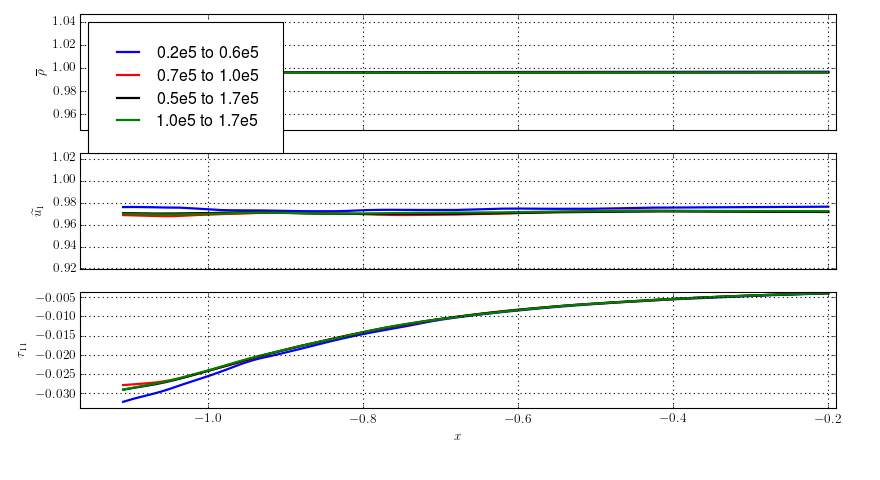

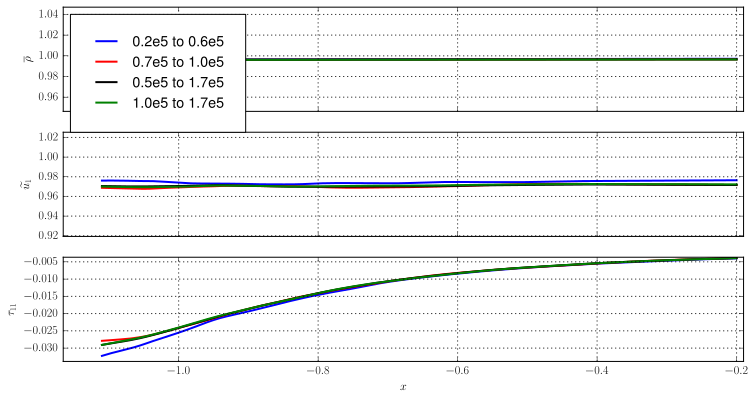

In [10]:
plotvars=[]
plotvars.append(comparecases.l[0].var.get_index(101,1))
plotvars.append(comparecases.l[0].var.get_index(101,2))
plotvars.append(comparecases.l[0].var.get_index(101,10))
comparecases.plot_var([0],plotvars)

<IPython.core.display.Javascript object>


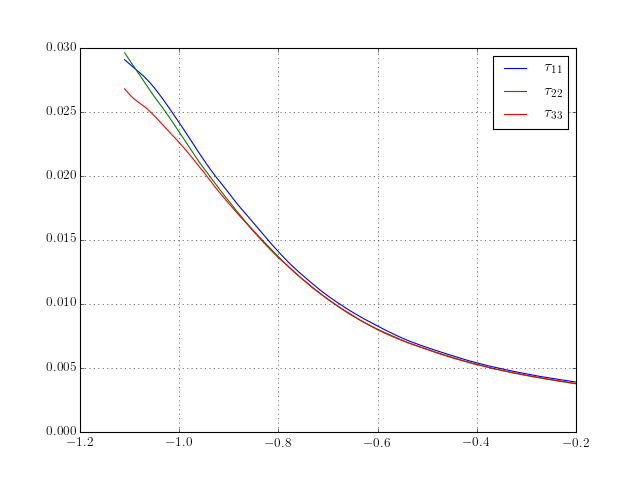

In [16]:
idy=[]
idy.append(comparecases.l[0].var.get_index(101,10))
idy.append(comparecases.l[0].var.get_index(101,12))
idy.append(comparecases.l[0].var.get_index(101,13))
plt.figure()
l=2
for i in idy:
    plt.plot(comparecases.l[l].data[:,0],-comparecases.l[l].data[:,i],label=comparecases.l[l].var.vars[i])
plt.legend()
plt.grid()